# Exploring and Processing the Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./../../../../Dropbox/__WSU_courses/BSAN734/house-prices-example.csv')
df = df.iloc[:,1:] #remove former index column because irrelevant noise

In [ ]:
df.head(10)

,lotsizesquarefeet,buildingqualitytypeid,calculatedbathnbr,bathroomcnt,bedroomcnt,regionidcity,regionidneighborhood,regionidzip,yearbuilt,roomcnt,lotsizesquarefeet.1,calculatedfinishedsquarefeet,structuretaxvaluedollarcnt
0,40247.0,7.0,2.0,2.0,2.0,12447.0,13327.0,96072.0,2004.0,0.0,40247.0,1090.0,232897.0
1,5420.0,4.0,2.0,2.0,4.0,12447.0,268496.0,96018.0,1957.0,0.0,5420.0,1931.0,124789.0
2,9085.0,8.0,2.0,2.0,3.0,12447.0,268588.0,96339.0,1962.0,0.0,9085.0,1766.0,120205.0
3,34845.0,9.0,3.0,3.0,5.0,12447.0,268588.0,96339.0,1995.0,0.0,34845.0,3085.0,378688.0
4,11009.0,8.0,3.0,3.0,5.0,12447.0,268588.0,96339.0,1965.0,0.0,11009.0,2401.0,162046.0
5,12910.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1984.0,0.0,12910.0,2397.0,274403.0
6,10095.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1981.0,0.0,10095.0,2574.0,239616.0
7,11119.0,8.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1965.0,0.0,11119.0,2225.0,208572.0
8,9787.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1983.0,0.0,9787.0,2661.0,258245.0
9,8280.0,6.0,3.0,3.0,4.0,12447.0,268588.0,96342.0,1960.0,0.0,8280.0,1830.0,132311.0


In [ ]:
dataset = df.values

In [ ]:
dataset

array([[4.02470e+04, 7.00000e+00, 2.00000e+00, ..., 4.02470e+04,
        1.09000e+03, 2.32897e+05],
       [5.42000e+03, 4.00000e+00, 2.00000e+00, ..., 5.42000e+03,
        1.93100e+03, 1.24789e+05],
       [9.08500e+03, 8.00000e+00, 2.00000e+00, ..., 9.08500e+03,
        1.76600e+03, 1.20205e+05],
       ...,
       [4.65600e+03, 4.00000e+00, 2.00000e+00, ..., 4.65600e+03,
        1.11400e+03, 6.82760e+04],
       [4.84000e+03, 4.00000e+00, 2.00000e+00, ..., 4.84000e+03,
        1.43600e+03, 9.51010e+04],
       [4.07900e+03, 6.00000e+00, 2.00000e+00, ..., 4.07900e+03,
        1.27000e+03, 6.36380e+04]])

In [ ]:
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
X.shape

(904287, 12)

In [ ]:
Y.shape

(904287,)

In [ ]:
#!conda install sklearn
!pip3 install sklearn

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[6.09901968e-03, 5.45454545e-01, 5.26315789e-02, ...,
        0.00000000e+00, 6.09901968e-03, 1.83893683e-02],
       [8.02394530e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 8.02394530e-04, 3.25908914e-02],
       [1.35978194e-03, 6.36363636e-01, 5.26315789e-02, ...,
        0.00000000e+00, 1.35978194e-03, 2.98046235e-02],
       ...,
       [6.86202449e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 6.86202449e-04, 1.87946436e-02],
       [7.14185882e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 7.14185882e-04, 2.42320877e-02],
       [5.98450052e-04, 4.54545455e-01, 5.26315789e-02, ...,
        0.00000000e+00, 5.98450052e-04, 2.14289333e-02]])

In [ ]:
from sklearn.model_selection import train_test_split

First, we split the training data. The remaining 30% of the data is used for testing and validation.

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(633000, 12) (135643, 12) (135644, 12) (633000,) (135643,) (135644,)


In [ ]:
#!conda install tensorflow
!pip3 install tensorflow

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(12,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=30,
          validation_data=(X_val, Y_val))

Train on 633000 samples, validate on 135643 samples
Epoch 1/30
633000/633000 [==============================] - 6s 9us/step - loss: 48224012504.7968 - mean_squared_error: 48224012504.7968 - mean_absolute_error: 118511.7762 - val_loss: 35101955564.1116 - val_mean_squared_error: 35101955564.1116 - val_mean_absolute_error: 98273.8465
Epoch 2/30
633000/633000 [==============================] - 5s 8us/step - loss: 34093962972.0646 - mean_squared_error: 34093962972.0646 - mean_absolute_error: 94826.8321 - val_loss: 31038258774.2839 - val_mean_squared_error: 31038258774.2839 - val_mean_absolute_error: 89463.5043
Epoch 3/30
633000/633000 [==============================] - 5s 8us/step - loss: 29151625805.7722 - mean_squared_error: 29151625805.7722 - mean_absolute_error: 84572.1228 - val_loss: 26049946245.4288 - val_mean_squared_error: 26049946245.4288 - val_mean_absolute_error: 79861.9551
Epoch 4/30
633000/633000 [==============================] - 5s 8us/step - loss: 25768235725.1947 - mean_squ

Epoch 30/30
633000/633000 [==============================] - 6s 9us/step - loss: 17699286460.3222 - mean_squared_error: 17699286460.3222 - mean_absolute_error: 66270.7352 - val_loss: 17389601140.9394 - val_mean_squared_error: 17389601140.9394 - val_mean_absolute_error: 65393.6543


In [ ]:
df.structuretaxvaluedollarcnt.mean()

172874.90233189243

# Visualizing Loss and Accuracy

In [ ]:
import matplotlib.pyplot as plt

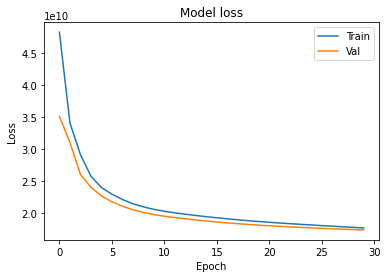

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Now we can computer performance on the test set, to see how the model performs on real data that hasn't been seen before.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
#!conda install numpy
!pip3 install numpy

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [ ]:
mean_absolute_error(Y_test, predictions)

66606.8869000034

In [ ]:
mean_squared_error(Y_test, predictions)
math.sqrt(mean_squared_error(Y_test, predictions))

148621.3146917384

In [ ]:
np.mean(Y_test)

174425.07187195896

In [ ]:
np.mean(predictions)

171368.12